<a href="https://colab.research.google.com/github/Odeyiany2/Machine_Learning_Projects-/blob/main/Predictive_Consumer_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries**

In [69]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, top_k_accuracy_score, confusion_matrix
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# **Importing the Dataset**

In [ ]:
df = pd.read_csv("/customer_booking.csv", encoding = "ISO-8859-1") #importing the data set

# **Exploratory Data Analysis**

In [ ]:
df.head() #getting the five rows in our dataset

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.shape #getting the number of rows and columns in our dataset

(50000, 14)

In [ ]:
df.info() #getting a summary of every column in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The .info() method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

1. num_passengers = number of passengers travelling
2. sales_channel = sales channel booking was made on
3. trip_type = trip Type (Round Trip, One Way, Circle Trip)
4. purchase_lead = number of days between travel date and booking date
5. length_of_stay = number of days spent at destination
6. flight_hour = hour of flight departure
7. flight_day = day of week of flight departure
8. route = origin -> destination flight route
9. booking_origin = country from where booking was made
10. wants_extra_baggage = if the customer wanted extra baggage in the booking
11. wants_preferred_seat = if the customer wanted a preferred seat in the booking
12. wants_in_flight_meals = if the customer wanted in-flight meals in the booking
13. flight_duration = total duration of flight (in hours)
14. booking_complete = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
#changing our flight day column to numerical data at the same time changing the dtype to integer
mask  = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mask)

In [ ]:
#getting the number of unique values each column has in our dataset
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [ ]:
df.describe() #generates a descritive statistics on our dataset

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
#getting the categorical and numerical columns in our data set
c = (df.dtypes =="object")
object_col = list(c[c].index)
print("Categorical Columns are: ", object_col)

#getting numerical columns
n = list(df.select_dtypes(include=[np.number]).columns.values)
print("Numerical Columns are: ", n)


Categorical Columns are:  ['sales_channel', 'trip_type', 'route', 'booking_origin']
Numerical Columns are:  ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']


# **Data Visualization**

**Univariate Analysis**

<Figure size 800x600 with 0 Axes>

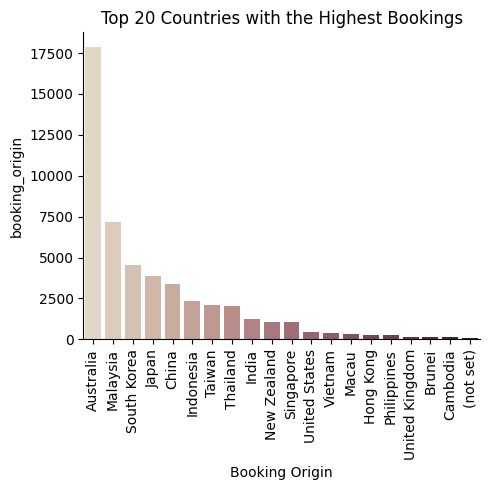

In [ ]:
plt.figure(figsize = (8,6))
country = (df["booking_origin"].value_counts().to_frame().reset_index())[:20]
sns.catplot(data = country, x = "index", y = "booking_origin", palette = "ch:.25", kind = "bar")
plt.title("Top 20 Countries with the Highest Bookings")
plt.xlabel("Booking Origin")
plt.xticks(rotation = 90)
plt.tight_layout();

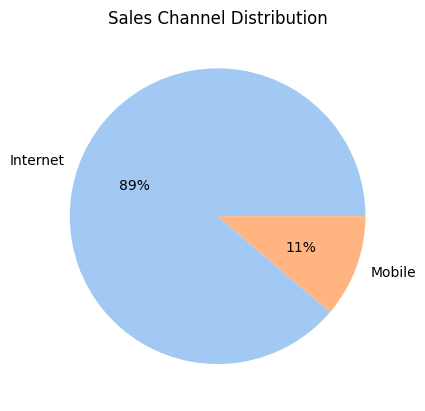

In [ ]:
#plt.figure(figsize = (8,6))
sales = dict(df['sales_channel'].value_counts(normalize = True))
palette = sns.color_palette("pastel")
plt.pie(sales.values(), labels = sales.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Sales Channel Distribution")
plt.show();

In [ ]:
fig = px.pie(df, names= "trip_type", title=f'Trip Type Distribution')
fig.show()

**Bivariate Analysis**

<Figure size 800x600 with 0 Axes>

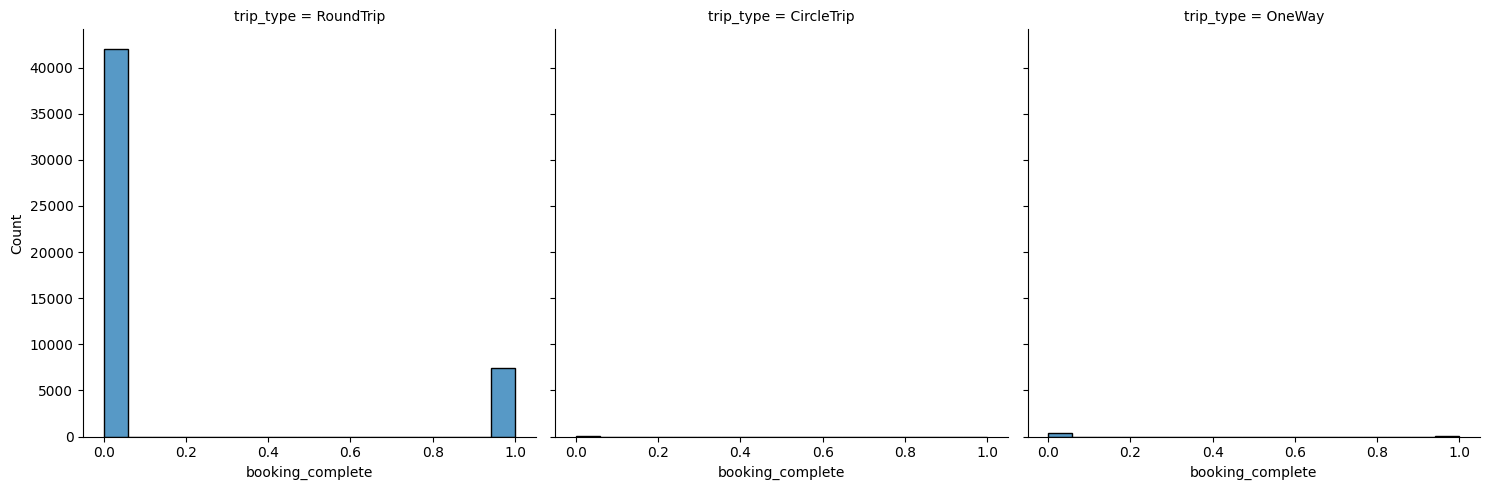

In [ ]:
plt.figure(figsize = (8,6))
sns.displot(df, x = "booking_complete", col = "trip_type");

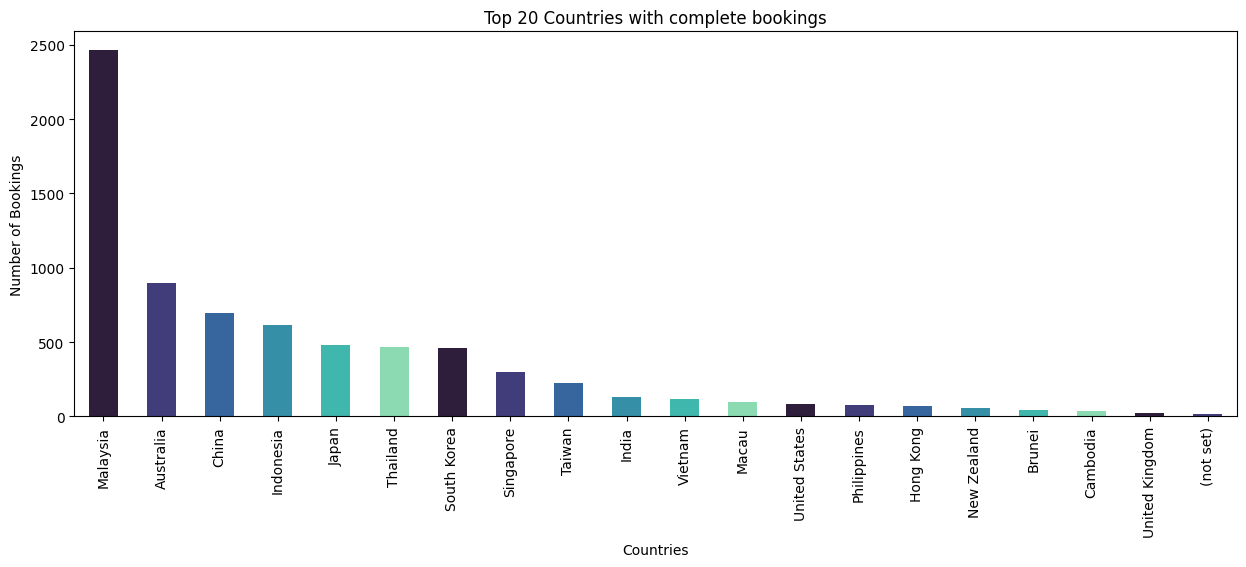

In [ ]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete==1].booking_origin.value_counts()[:20].plot(kind="bar", color = sns.color_palette("mako"))
ax.set_xlabel("Countries")
ax.set_title("Top 20 Countries with complete bookings")
ax.set_ylabel("Number of Bookings");

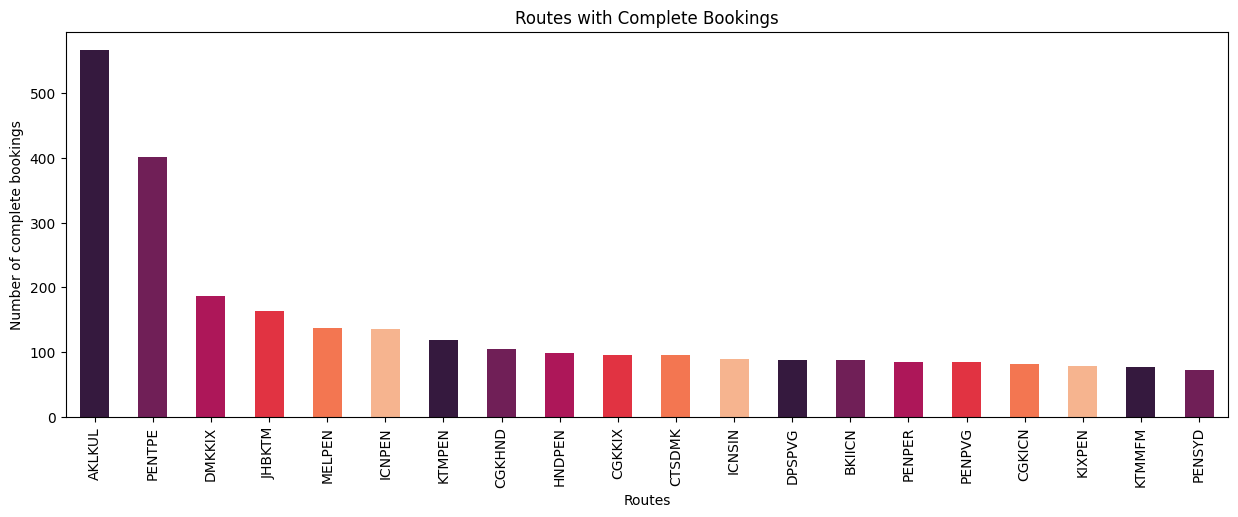

In [ ]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].route.value_counts()[:20].plot(kind="bar", color = sns.color_palette("rocket"))
ax.set_xlabel("Routes")
ax.set_ylabel("Number of complete bookings")
ax.set_title("Routes with Complete Bookings");

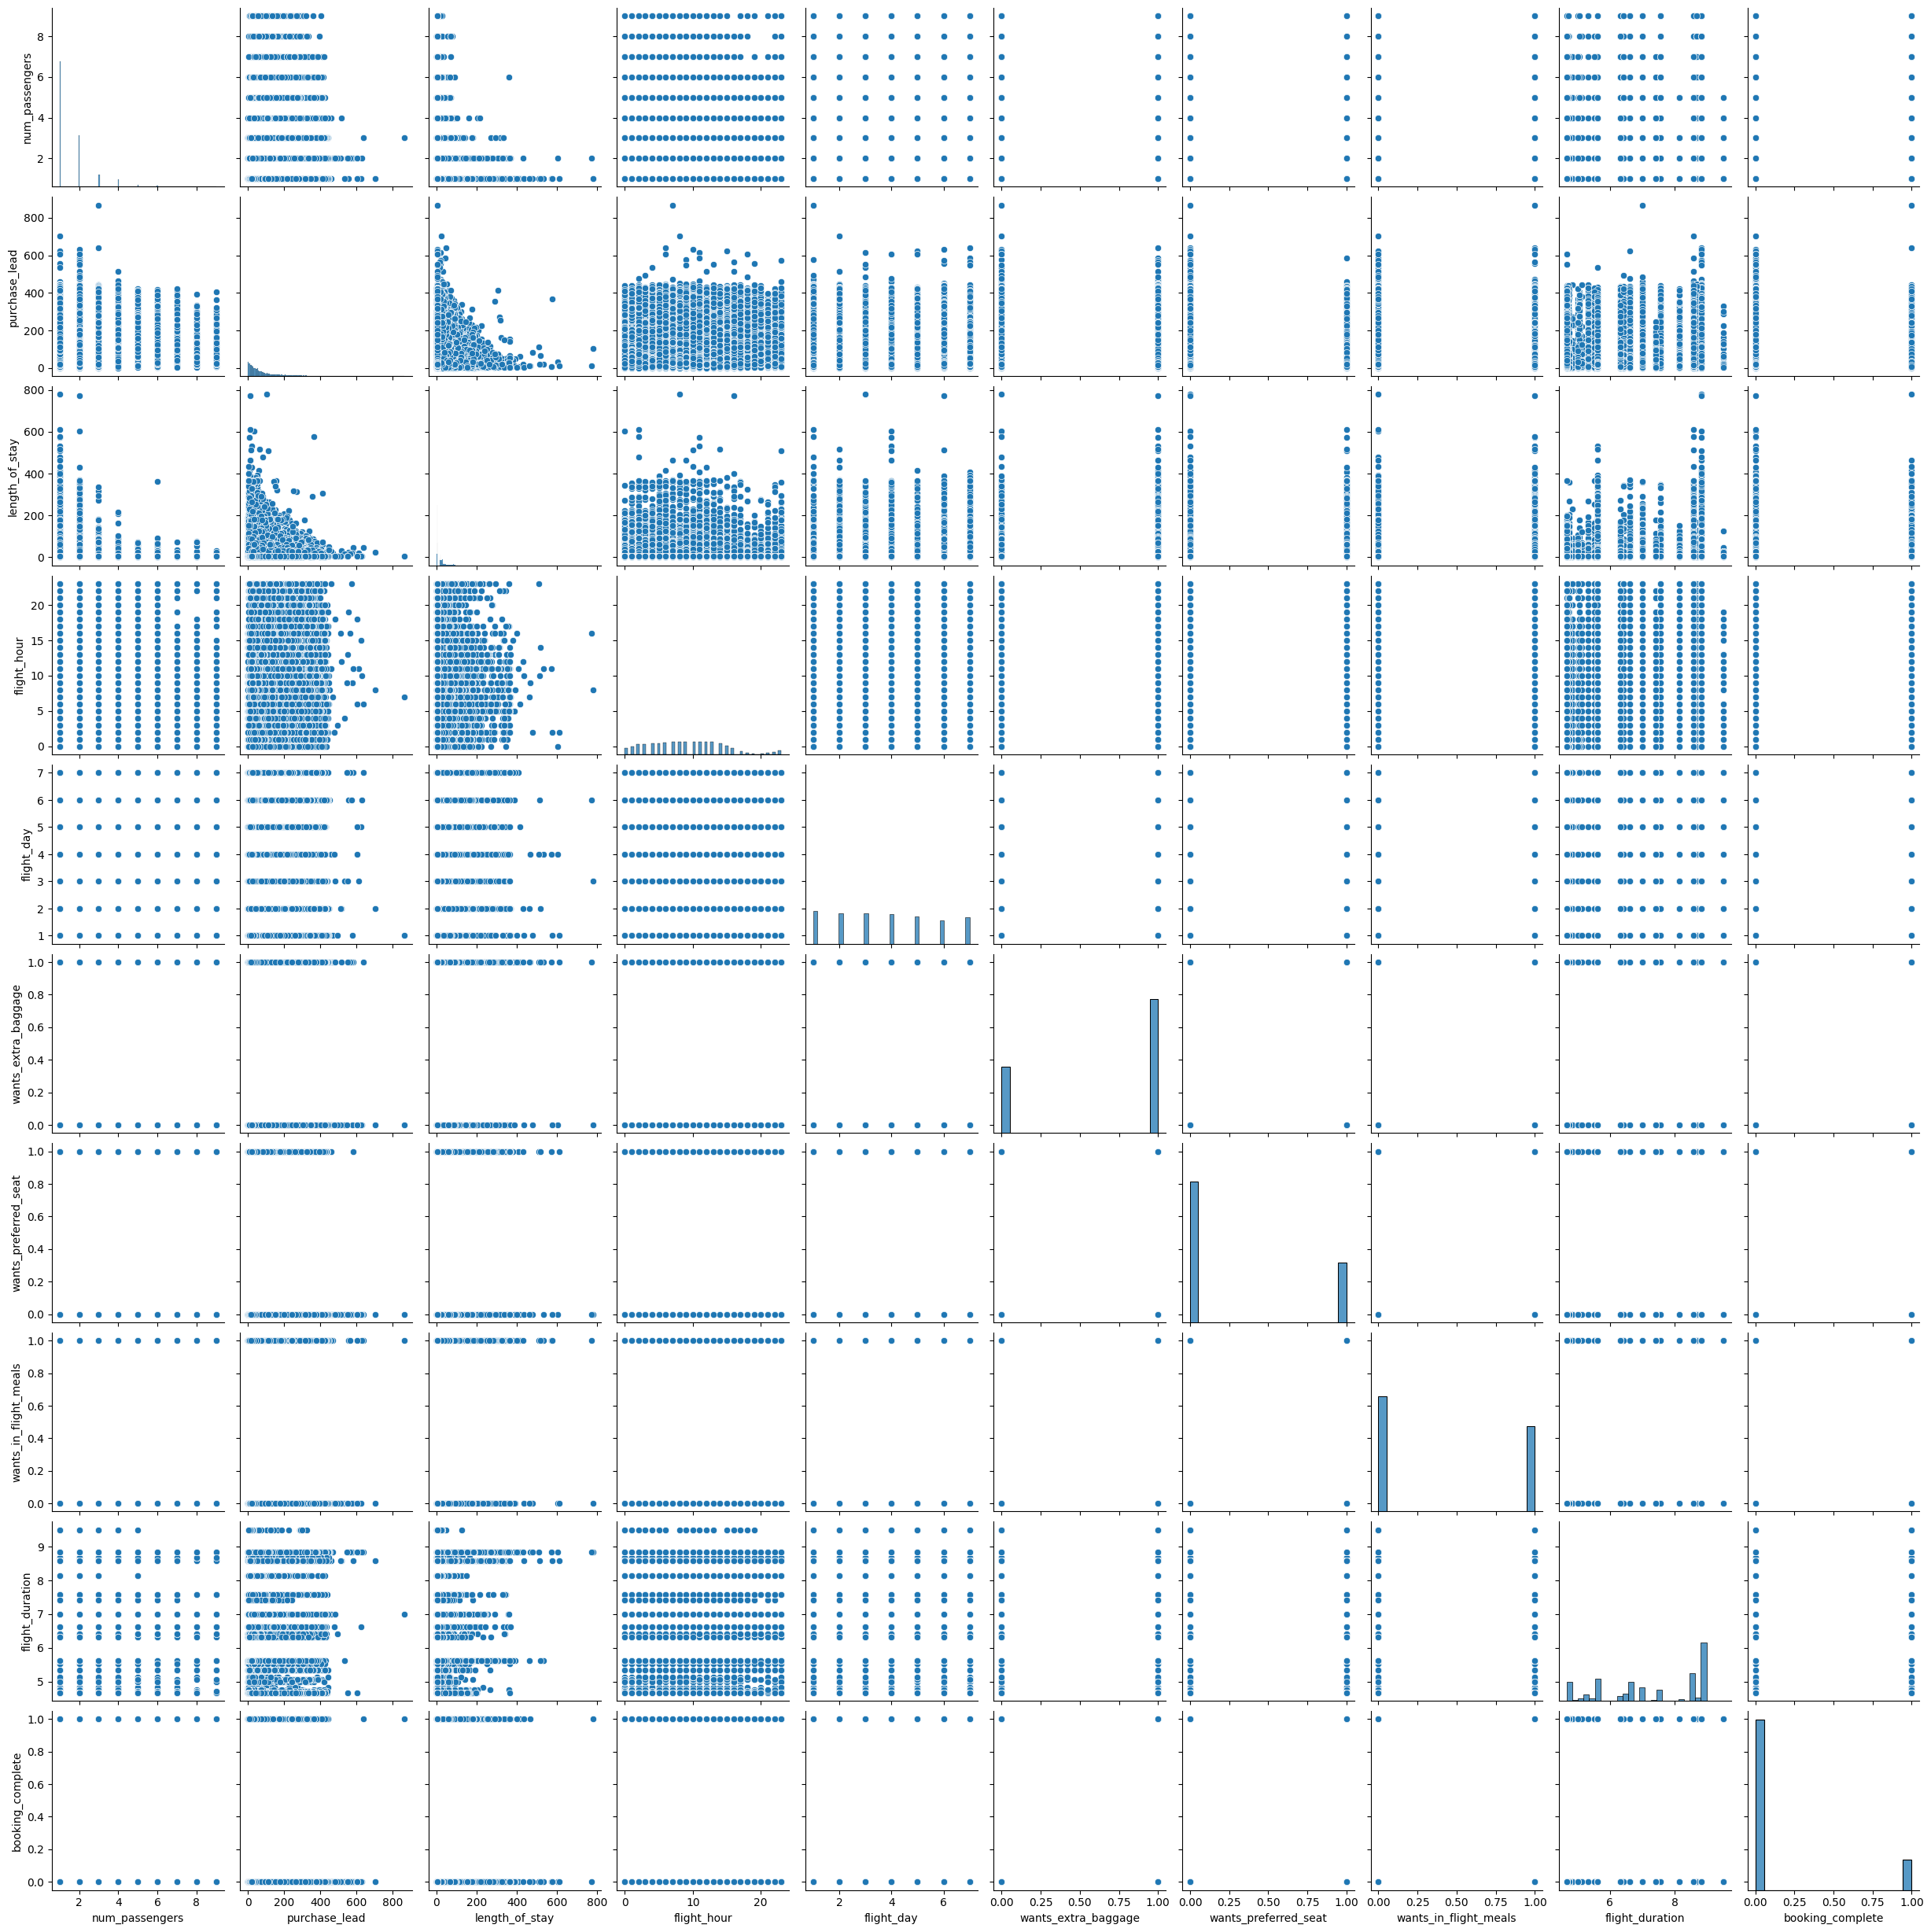

In [ ]:
sns.pairplot(df)

<ipython-input-50-76ea7068397c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

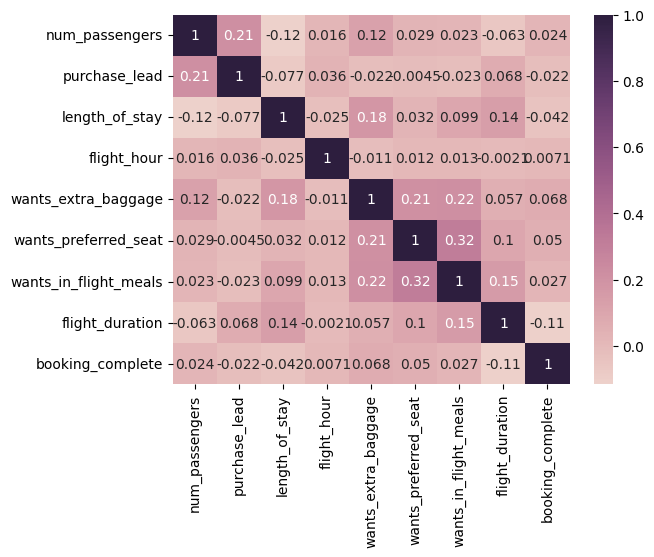

In [ ]:
#creating a heatmap
sns.heatmap(df.corr(), annot = True,  cmap=sns.cubehelix_palette(as_cmap=True))

# **Model Building**

In [ ]:
#feature selection
df_X = df.drop("booking_complete", axis = 1)

#encoding our categorical data in our feature
X = pd.get_dummies(df_X, drop_first = True)

#target variable
y = df["booking_complete"]

#splitting our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#initializing our model
rfc = RandomForestClassifier()

#fit the training data
rfc.fit(X_train,y_train)


In [71]:
#making predictions
y_pred = rfc.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [70]:
#model evaluation
# Define the number of folds (k) for cross-validation
num_folds = 5

# Perform cross-validation using cross_val_score
cross_val_scores = cross_val_score(rfc, X, y, cv=num_folds, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cross_val_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
mean_accuracy = cross_val_scores.mean()
std_deviation = cross_val_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")


Cross-Validation Scores: [0.8485 0.7712 0.7211 0.5425 0.7797]
Mean Accuracy: 0.73
Standard Deviation: 0.10


In [72]:
#model evaluation 2
accuracy = accuracy_score(y_test, y_pred)
con = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8522


In [73]:
print(f"Confusion Matrix: {con}")

Confusion Matrix: [[8315  172]
 [1306  207]]


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8487
           1       0.55      0.14      0.22      1513

    accuracy                           0.85     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.85      0.81     10000



**Visualization to show how each variable contributed to the model**

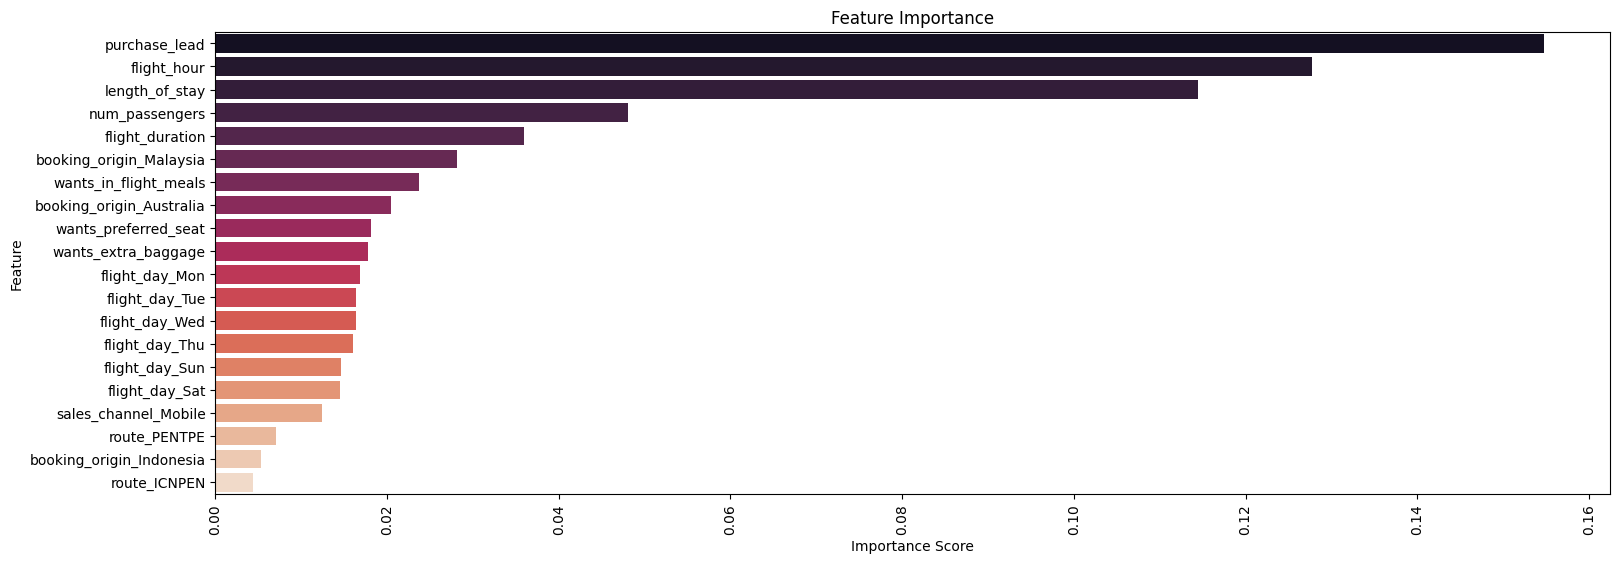

In [79]:
# Initializing the machine learning model
rcf = RandomForestClassifier()  # Replace with your model

# Fit the model to the data
rcf.fit(X, y)  # X is the feature matrix, y is the target variable

# Get feature importances from the model
feature_importances = rcf.feature_importances_

# Create a DataFrame to associate feature names with their importance scores (assuming your features are named)
feature_names = list(X.columns)  # Replace with your feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = (feature_importance_df.sort_values(by='Importance', ascending=False))[:20]

# Create a bar plot to visualize feature importance
plt.figure(figsize=(18, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette = "rocket")
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.xticks(rotation = 90)
plt.ylabel('Feature')
plt.show()


**From the above visualization, we can see that columns such as [purchase_lead, flight_hour, length_of_stay, num_passengers and flight_duration] are the top five features that contributed highly to our model prediction. So therefore, Customers then to complete their booking of a flight if the above features meet their expectations.**